
<div align="center">
  <a href="https://www.w-hs.de/maschinenbau-master-boh/">
    <img src="https://www.w-hs.de/typo3conf/ext/whs/Resources/Public/Images/Pagelayout/w-hs_pagelogo.png" 
    alt="Images" width="500" height="200">
  </a>
</div>
<br>
<h1 align="center"> Sondergebiete der Simulation</h1>
<h3 align="center"> WS 21/22 </h3>
<br>

### 1. Beschreibung des Systems: *Inverses Pendel*
### 2. Herleitung der Bewegungsgleichungen nach Legrange
### 3. Numerische Lösung der Bewegungsgleichungen
### 4. Vizualisierung und Animation der Ergebnisse
<br>

<div align="center">
  <a href="https://en.wikipedia.org/wiki/Inverted_pendulum">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/00/Cart-pendulum.svg" 
    alt="Images" width="250" height="100">
  </a>
</div>

## Schematische Darstellung des inversen Pendels auf einem Wagen $\rightarrow$ [Inverted Pendulum](https://en.wikipedia.org/wiki/Inverted_pendulum)

> * Das System hat zwei Freiheitsgrade und lässt sich über die beiden Koordinaten $x$ und $\theta$ vollständig beschreiben.
> * Koordinatenurspung sowie vertikales Lot liegen im Drehgelenk des Pendels.
> * Der Wagen kann sich lediglich auf der x-Achse bewegen $\rightarrow y = 0$. 
> * Reibung wird sowohl zwischen Wagen und Bahn, als auch im Drehgelenk des Pendels angenommen.

> * Die Pendelstange wird als masselos betrachtet und hat die Länge $l$ $\rightarrow$ *mathematisches* Pendel. 
> * Die Masse des Wagens und die Punktmasse am Ende der Stange werden als $M$ und $m$ bezeichnet.
> * $F$ stellt eine externe Kraft zum Beschleunigen des Wagens dar ($\rightarrow$ für das freie Pendel ist $F = const = 0$)

> Die Anregung des Wagens, um das Pendel in der aufrechten Position zu halten, wird in diesem Script nicht betrachtet
$\rightarrow$ [Inverted Pendulum Reinforcement Learning](https://github.com/lennart2810/InvertedPendulumSDS/blob/master/RL/Inverted%20Pendulum%20RL.ipynb)

In [21]:
import sympy
from sympy import Symbol, symbols, Function, diff, sin, cos, Matrix, Rational, Eq, solve, lambdify
import sympy.physics.mechanics as mech
mech.init_vprinting()

Symbolische Definition der Zeit $t$, der gegebenen Größen $l, M, m, g ~und~ F$ und der Zwangsbedingung $y = 0$:

In [22]:
t = Symbol('t')
l, M, m, g, F, D, d = symbols('l M m, g, F, D, d')

y = 0 # Zwangsbedingung

### generalisierten Koordinaten
Definition der zeitabhängigen, generalisierten Koordinaten $x$ und $\theta$, sowie deren Ableitungen:

$x(t)$, $\dot{x}(t)$ und $\ddot{x}(t)$

In [23]:
x = Function('x')(t)
x_d = diff(x, t)
x_dd = diff(x, t,t)

$\theta(t)$, $\dot{\theta}(t)$ und $\ddot{\theta}(t)$

In [24]:
theta = Function('theta')(t)
theta_d = diff(theta, t)
theta_dd = diff(theta_d, t)

### Kinematik

"The branch of physics known as **kinematics** deals with using mathematical descriptions – a set of equations of motion – and definitions to explain how real-world objects move about. [...]
It doesn't regard the mass of any object in the system to describe its motion, whereas **kinetics** does." [sciencing.com](https://sciencing.com/kinetics-vs-kinematics-whats-the-difference-why-it-matters-13720229.html)


Pendelposition und -geschwindigkeit in Abhängigkeit der generalisierten Koordinaten $x$ und $\theta$

In [25]:
x2 = x - l * sin(theta)
y2 = y + l * cos(theta)
display(Matrix([[x2], [y2]]))

x2_d = x2.diff(t)
y2_d = y2.diff(t)
display(Matrix([[x2_d], [y2_d]]))

⎡-l⋅sin(θ) + x⎤
⎢             ⎥
⎣  l⋅cos(θ)   ⎦

⎡-l⋅cos(θ)⋅θ̇ + ẋ⎤
⎢               ⎥
⎣  -l⋅sin(θ)⋅θ̇  ⎦

### Kinetik
* Die kinetische Energie des Gesamtsystems berechnet sich aus den Massen und Geschwindigkeiten der Teilsysteme __Wagen__ und __Pendel__:
$$T = \sum_i \frac{m_i}{2} \cdot v_i^2$$


* Lediglich das **Pendel** trägt zur potentiellen Energie des Gesamtsystems bei: $V = m \cdot g \cdot y_2$ 

In [26]:
T = Rational(1,2) * M * (x_d)**2 + Rational(1,2) * m * (x2_d**2 + y2_d**2)
display(T)

In [27]:
V = M * g * y + m * g * y2 
display(V)

### Lagrange Funktion:

In [28]:
L = T - V
display(L)

### Euler-Legrange Gleichungen:
Partielle Ableitung der Legrange Funktion nach den Koordinaten $x$ und $\theta$:

$$\frac{\partial L}{\partial x} - \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = F - \dot{x}D$$

$$\frac{\partial L}{\partial \theta} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} = - \delta\dot{\theta}$$

In [29]:
LE_x = diff(diff(L, x_d), t) - diff(L, x)
LE_x = Eq(LE_x, F -  x_d * D)

LE_theta = diff(diff(L, theta_d), t) - diff(L, theta)
LE_theta = Eq(LE_theta, -theta_d * d)

display(Matrix([[LE_x.simplify()], [LE_theta.simplify()]]))

⎡                   ⎛          2                 ⎞⎤
⎢D⋅ẋ - F = -M⋅ẍ - m⋅⎝l⋅sin(θ)⋅θ̇  - l⋅cos(θ)⋅θ̈ + ẍ⎠⎥
⎢                                                 ⎥
⎣     d⋅θ̇ = -l⋅m⋅(-g⋅sin(θ) + l⋅θ̈ - cos(θ)⋅ẍ)     ⎦

### Lösung des Bewegungsgleichungen nach $\ddot{x}$ und $\ddot{\theta}$ mit sympy's `solve`.

In [30]:
solutions = solve([LE_x, LE_theta], (x_dd, theta_dd), simplify=True)

#### Lösung für $\ddot{x}$:

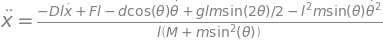

In [31]:
display(Eq(x_dd,solutions[x_dd]))

#### Lösung für $\ddot{\theta}$:

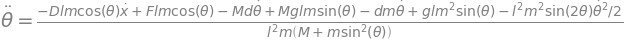

In [32]:
display(Eq(theta_dd, solutions[theta_dd]))

### Gleichungssystem

Als Ergebnis bekommen wir zwei Differentialgleichungen **2. Ordnung**.

Diese müssen in DGL **1. Ordung** umgewandelt werden, damit Python diese *numerisch* Lösen kann!

Dafür werden die Variablen $v$ und $\omega$ eingeführt, um das System über 4 DGL 1. Ordnung beschreiben zu können:

1. $\dot x = v$
2. $\ddot x = \dot v$ 


3. $\dot\theta = \omega$
4. $\ddot\theta = \dot \omega$


Die **symbolischen** Ausdrücke müssen für den Solver als **numerische** Funktionen implementiert werden.

Hierfür wird sympy's `lambdify` Methode genutzt, welche die symbolischen Funktionen und deren Parameter erwartet.

* $dx/dt = v$
* $d v/dt =$ solutions[x_dd]


* $d\theta/dt = \omega$
* $d\omega/dt =$ solutions[theta_dd]

In [33]:
dxdt = lambdify(x_d, x_d)
dvdt = lambdify((t,g,M,m,l,x_d,theta,theta_d,F,D,d), solutions[x_dd])

dthetadt = lambdify(theta_d, theta_d)
domegadt = lambdify((t,g,M,m,l,x_d,theta,theta_d,F,D,d), solutions[theta_dd])

### State-Vektor

Der Systemzustand wird über den zeitabhängigen *State-Vektor* $\vec{S} = [x, v, \theta, \omega]$ definiert.

Der Python Solver benötigt eine Funktion, die $\vec{S}$ entgegennimmt und $d\vec{S}/dt$ zurückgibt.

In [34]:
def dSdt(S, t, M, m, D, d, l, F):
    _x, _v, _theta, _omega = S
    return [
        dxdt(_v),
        dvdt(t, g, M, m, l, _v, _theta, _omega, F, D, d),
        dthetadt(_omega),
        domegadt(t, g, M, m , l, _v, _theta, _omega, F, D, d)
    ]

### Symbolisch $\rightarrow$ Numerisch

Bis hierhin wurde das System ausschließlich symbolisch betrachtet. 
Der Bewegungsablauf des inversen Pendels soll nun konktret dargestellen werden.
Hierfür werden die symbolischen Variablen überschrieben:

In [35]:
from numpy import linspace

# time
t1 = 20                          # s 
samples = 300                    # n 
t = linspace(0, t1, samples)     # s

# init
x = 0.0                          # m
v = 0.0                          # m/s
theta =  1.57                      # rad
omega = 0.0                      # rad/s
S0 = [x, v, theta, omega]        # Start-Vektor

# const
g = 9.81                         # m/s^2

### Numerisches Lösen der Gleichungen mit scipy's `odeint`:

Die Methode `odeint` erwartet folgende Parameter:
* die Differentialgleichungen `dSdt` (1. Ordnung)
* den Anfangszustand $S_0$
* den Zeitbereich $t$
* die numerischen Parameter

## Berechnung und Darstellung der Ergebnisse:

In [36]:
from numpy import pi
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from ipywidgets import interact_manual, IntSlider, FloatSlider
from IPython.display import display, clear_output

M_slider = IntSlider(value=5,min=2,max=20,step=1,description=r'$M$') 
m_slider = IntSlider(value=1,min=1,max=5,step=1,description=r'$m$')
D_slider = FloatSlider(value=0.5,min=0,max=10,step=0.5,description=r'$D$') 
d_slider = FloatSlider(value=0.05,min=0,max=1,step=0.05,description=r'$d$')
l_slider = FloatSlider(value=1,min=0.5,max=3,step=0.5,description=r'$l$') 
F_slider = FloatSlider(value=0,min=0,max=1,step=1,description=r'$F$')

def interaction(M, m, D, d, l, F):
    
    global S0
    
    ans = odeint(dSdt, y0=S0, t=t, args=(M, m, D, d, l, F))
    x = ans.T[0]
    theta = ans.T[2]
    
    fig, (ax1) = plt.subplots(1,1, figsize=(6,3), sharey=True, dpi=120)
    ax1.plot(t, x, label=r'$x~[m]$')
    ax1.plot(t, theta, label=r'$\theta~[rad]$')
    ax1.set_title('gedämpftes inverses Pendel');
    ax1.set_xlabel('Time [s]');  
    ax1.legend()
    #plt.show()
    plt.savefig("dampedSolution.png")
    

interactive_plot = interact_manual(interaction, M=M_slider, m=m_slider, D=D_slider, d=d_slider, l=l_slider, F=F_slider)

interactive(children=(IntSlider(value=5, description='$M$', max=20, min=2), IntSlider(value=1, description='$m…

##### Periodendauer T
$ T = 2\pi \sqrt{\frac{\ell}{g}}$

## Animation der Bewegungsgleichung

In [37]:
from matplotlib import animation
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from matplotlib.animation import PillowWriter
%matplotlib inline
#%matplotlib notebook # --> animation im Jupyter Notebook

In [38]:
# Animations-Parameter
M = 5                            # kg
m = 2                            # kg
D = 0.5                          # N*s/m
d = 0.1                          # Nm*s
l = 1                            # m
F = 0                            # N

In [39]:
# Simulation mit entsprechenden Parametern durchführen
ans = odeint(dSdt, y0=S0, t=t, args=(M, m, D, d, l, F))
x = ans.T[0]
theta = ans.T[2]

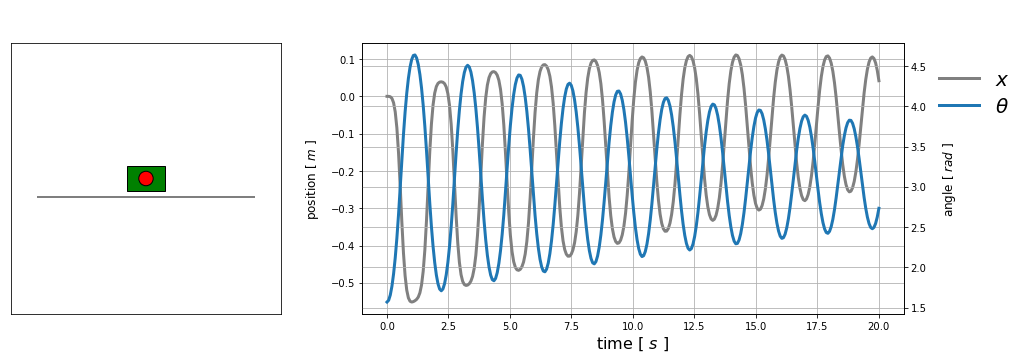

In [40]:
fig = plt.figure(figsize=(16,5))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

# Title
string = r"%s "%(' ')
fig.suptitle(string, fontsize=24)

# Pendelplot
ax1 = fig.add_subplot(gs[0, 0], autoscale_on=True, xlim=(-l*1.5, l*1.5), ylim=(-l*1.5, l*1.5)) 
ax1.get_xaxis().set_ticks([]) # enable this to hide x axis ticks
ax1.get_yaxis().set_ticks([]) # enable this to hide y axis ticks

# Wagen
cart_w, cart_h = 0.42, 0.28 # Breite, Höhe, Raddurchmesser
cart = ax1.add_patch(Rectangle((0, 0), 0, 0, linewidth=1, edgecolor='k', facecolor='g'))
wheels, = ax1.plot([], [], 'ok', markersize=8) 
ground, = ax1.plot([-1.2,1.2], [-(cart_h/2+.06),-(cart_h/2+.06)], '-k', alpha=.5, lw=2, zorder=0)

# Pendel
pendulum, = ax1.plot([], [], '-k', lw=2, marker='o') # Pendelstange als Linie darstellen
circle = plt.Circle((0,0), 0.08, fc='r', edgecolor='k', zorder=3) # Pendelmasse als Kreis darstellen
circle = ax1.add_patch(circle)

# Zeitlabel
dt = t1 / samples
time_template = 'time = %.1fs'
time_text = ax1.text(0.05, 1.02, '', transform=ax1.transAxes, fontsize=16)

# Zeitplot Wagen
ax2 = fig.add_subplot(gs[:, 1], autoscale_on=True)
ax2.set_xlabel('time [$~s~$]', fontsize=16)
ax2.plot(t,x, color="grey", linewidth=3, alpha=1, label="$x$")
ax2.legend(loc=(1.05,0.8), frameon=False, fontsize=20)
ax2.set_ylabel('position [$~m~$]', color='k', fontsize=12, labelpad=10)
ax2.grid()
x_point, = ax2.plot([], [], 'o-', color='g', markersize=12)

# Zeitplot Pendel
ax3 = ax2.twinx()
ax3.plot(t,theta, color="tab:blue", linewidth=3, alpha=1, label=r"$\theta$")
ax3.legend(loc=(1.05,0.7), frameon=False, fontsize=20)
ax3.set_ylabel('angle [$~rad~$]', fontsize=12, labelpad=14)
ax3.grid()
theta_point, = ax3.plot([], [], 'o-', color='r', markersize=10)


def init():
    cart.set_height(cart_h)
    cart.set_xy((-cart_w/2, -cart_h/2))
    cart.set_width(cart_w)
    pendulum.set_data([], [])
    wheels.set_data([],[])
    time_text.set_text('')
    return cart, pendulum, time_text

def animate(i):
    
    # Wagenposition
    cart.set_x(x[i] - cart_w/2)
    wheels.set_data([x[i]+cart_w/3, x[i]-cart_w/3],[-cart_h/2,-cart_h/2])
    
    # Pemdelmasse
    x2 = x[i] -l * sin(theta[i])
    y2 = l * cos(theta[i])
    circle.set_center((x2, y2))
    
    # Pendelstande
    thisx = [x[i], x2]
    thisy = [0, y2]
    pendulum.set_data(thisx, thisy)
    
    # Samplezeit
    time_text.set_text(time_template % (i*dt))
    
    # Zeitverlauf
    x_point.set_data(t[i], x[i])
    theta_point.set_data(t[i], theta[i])
    
    return cart, pendulum, time_text

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=samples, blit=True)
#ani.save('InvertedPendulum.gif', writer='pillow', fps=samples/t1, dpi=180)